In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
import os
import pandas as pd
import numpy as np

In [207]:
# Specify the folder path where the CSV files are located
path1 = "/content/drive/MyDrive/3014 Project/CSVs/Batch1"
# Create an empty list to store the DataFrames
dataframes1 = []
# Iterate through all files in the folder
for file_name in os.listdir(path1):
    if file_name.endswith(".csv"):
        # Read each CSV file into a DataFrame
        file_path1 = os.path.join(path1, file_name)
        df1= pd.read_csv(file_path1,low_memory=False)
        dataframes1.append(df1)
# Concatenate all DataFrames into a single DataFrame
combine1 = pd.concat(dataframes1, ignore_index=True)
print(combine1.shape)

(197132, 75)


In [208]:
# Specify the folder path where the CSV files are located
path2 = "/content/drive/MyDrive/3014 Project/CSVs/Batch2"
# Create an empty list to store the DataFrames
dataframes2 = []
# Iterate through all files in the folder
for file_name in os.listdir(path2):
    if file_name.endswith(".csv"):
        # Read each CSV file into a DataFrame
        file_path2 = os.path.join(path2, file_name)
        df2= pd.read_csv(file_path2,low_memory=False)
        dataframes2.append(df2)
# Concatenate all DataFrames into a single DataFrame
combine2 = pd.concat(dataframes2, ignore_index=True)
print(combine2.shape)

(370995, 83)


In [209]:
# Concatenate all combined dataframes into a single final combined DataFrame
FinalDFList=[]
FinalDFList.append(combine1)
FinalDFList.append(combine2)
FinalCombo = pd.concat(FinalDFList, ignore_index=True)
FinalCombo = FinalCombo.sort_values(by='bathrooms', na_position='last', ascending=False)
print(FinalCombo.shape)
#print(FinalCombo[['host_location']].head(50))

(568127, 83)


In [210]:
#Making CSV from the final dataset
subset_df = FinalCombo.head(10000)
print(subset_df.shape)

(10000, 83)


In [211]:
subset_df.to_csv("/content/drive/MyDrive/3014 Project/CSVs/FinalAirBnbDataset.csv",index=False)
cols = [
    'id',
    'host_id',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listings_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

data = pd.read_csv('/content/drive/MyDrive/3014 Project/CSVs/FinalAirBnbDataset.csv', usecols=cols)


In [212]:
data.head()

,id,host_id,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating
0,155548.0,748161,1.0,Entire rental unit,Entire home/apt,3,t,1.0,1.0,$200.00,3,0,21,4.76
1,50602388.0,60332116,1.0,Entire rental unit,Entire home/apt,4,t,1.0,1.0,$170.00,3,1,2,4.50
2,50608863.0,3854958,1.0,Entire rental unit,Entire home/apt,4,t,2.0,2.0,$354.00,5,0,14,5.00
3,50605312.0,44442865,1.0,Entire condo,Entire home/apt,3,t,2.0,1.0,$240.00,3,0,4,5.00
4,50335507.0,405777047,1.0,Entire rental unit,Entire home/apt,4,t,2.0,2.0,$317.00,3,0,8,4.38


In [213]:
# determine the number of missing entries in each column
for col in data.columns:
    print(col + ', Number of Missing Values:', len(data[col][data[col].isnull()]))

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_listings_count, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 1332
bedrooms, Number of Missing Values: 2011
beds, Number of Missing Values: 93
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
review_scores_rating, Number of Missing Values: 1000


In [214]:
## Fill NaN values in dataframe using mode of every column

# Calculate the mode for all columns except 'column3'
mode_values = data.drop(columns=['review_scores_rating']).mode().iloc[0]
columns_to_fill = data.columns.difference(['review_scores_rating'])
data[columns_to_fill] = data[columns_to_fill].fillna(mode_values)
print(data)

              id    host_id  host_listings_count                property_type  \
0       155548.0     748161                  1.0           Entire rental unit   
1     50602388.0   60332116                  1.0           Entire rental unit   
2     50608863.0    3854958                  1.0           Entire rental unit   
3     50605312.0   44442865                  1.0                 Entire condo   
4     50335507.0  405777047                  1.0           Entire rental unit   
...          ...        ...                  ...                          ...   
9995   3675469.0   17688638                  2.0  Private room in rental unit   
9996   3756811.0     582060                 36.0           Entire rental unit   
9997   4004925.0   20765287                  2.0           Entire rental unit   
9998   3757269.0     582060                 36.0           Entire rental unit   
9999   4009675.0   20790978                 19.0           Entire rental unit   

            room_type  acco

In [215]:
for col in data.columns:
    print(col + ', Number of Missing Values:', len(data[col][data[col].isnull()]))

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_listings_count, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 0
bedrooms, Number of Missing Values: 0
beds, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
review_scores_rating, Number of Missing Values: 1000


In [216]:
# convert formatting for price if needed
print(data.dtypes)
print(data[['price']].head(10))
if data['price'].dtypes!=np.float64:
  data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))

id                      float64
host_id                   int64
host_listings_count     float64
property_type            object
room_type                object
accommodates              int64
bathrooms                object
bedrooms                float64
beds                    float64
price                    object
minimum_nights            int64
availability_30           int64
number_of_reviews         int64
review_scores_rating    float64
dtype: object
     price
0  $200.00
1  $170.00
2  $354.00
3  $240.00
4  $317.00
5  $174.00
6  $850.00
7  $201.00
8  $170.00
9  $350.00


<ipython-input-216-8661280fa2a8>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))


In [217]:
# drop any inconsistent values
print('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print('Number of Beds 0:', len(data[data['beds'] == 0]))
print('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

print("\nAfter dropping inconsistent values")
print('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print('Number of Beds 0:', len(data[data['beds'] == 0]))
print('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))


Number of Accommodates 0: 0
Number of Bedrooms 0: 0
Number of Beds 0: 0
Number of Listings with Price $0.00: 1

After dropping inconsistent values
Number of Accommodates 0: 0
Number of Bedrooms 0: 0
Number of Beds 0: 0
Number of Listings with Price $0.00: 0


In [218]:
data.head()

,id,host_id,host_listings_count,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating
0,155548.0,748161,1.0,Entire rental unit,Entire home/apt,3,t,1.0,1.0,200.0,3,0,21,4.76
1,50602388.0,60332116,1.0,Entire rental unit,Entire home/apt,4,t,1.0,1.0,170.0,3,1,2,4.50
2,50608863.0,3854958,1.0,Entire rental unit,Entire home/apt,4,t,2.0,2.0,354.0,5,0,14,5.00
3,50605312.0,44442865,1.0,Entire condo,Entire home/apt,3,t,2.0,1.0,240.0,3,0,4,5.00
4,50335507.0,405777047,1.0,Entire rental unit,Entire home/apt,4,t,2.0,2.0,317.0,3,0,8,4.38


In [219]:
# explore distribution of accommodates
value_counts = data['accommodates'].value_counts()

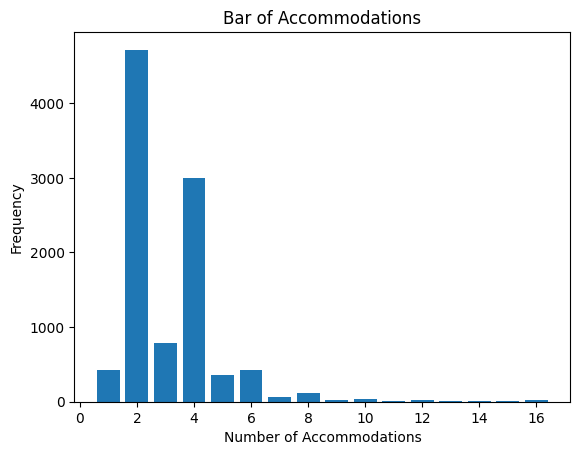

In [220]:
# visualize distribution of accommodates
import matplotlib.pyplot as plt
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Number of Accommodations')
plt.ylabel('Frequency')
plt.title('Bar of Accommodations')
plt.show()


**As we can see that most of the accomodates are of 1-4 people so now we will go for bed plotting**



In [221]:
# explore distribution of beds
value_counts1 = data['beds'].value_counts()

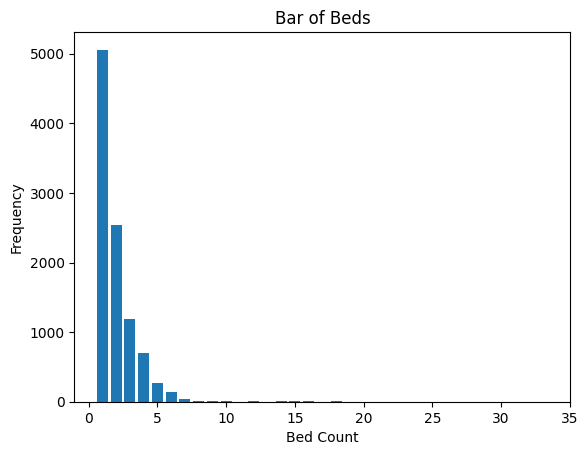

In [222]:
# visualize distribution of beds
import matplotlib.pyplot as plt
plt.bar(value_counts1.index, value_counts1.values)
plt.xlabel('Bed Count')
plt.ylabel('Frequency')
plt.title('Bar of Beds')
plt.show()

**Here we can see that mostly single bed rooms are getting purchased**

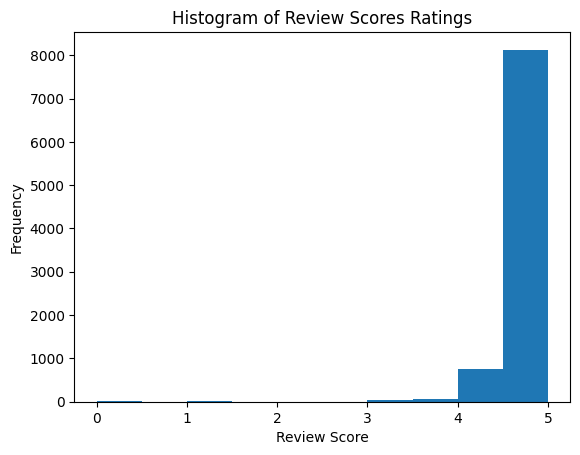

In [223]:
# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

**Here we can see that the most of the ratings are 4-5 and it is left skewed but we will handle it don't worry at all!**

In [224]:
data['review_scores_rating'] = data['review_scores_rating'].astype(str)
print(data[['review_scores_rating']].dtypes)

review_scores_rating    object
dtype: object


In [225]:
# turn NaN scores with 0 reviews into 'No Reviews'
# Convert the 'column_name' to boolean type
data['review_scores_rating'] = data['review_scores_rating'].map(lambda x: 't' if x == 'True' else (False if x == 'False' else None))
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, ('review_scores_rating')] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]

In [226]:
# convert review_scores_rating into buckets
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 4 and val <=5:
        return '4-5'
    elif val >= 3 and val <4:
        return '3-3.9'
    elif val >= 2 and val < 3:
        return '2-2.9'
    elif val >= 1 and val < 2:
        return '1-1.9'
    elif val < 1:
        return '0-0.9'

data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print(data[['review_scores_rating']])
print('Unique Values in the Column:', np.unique(data['review_scores_rating']))

Empty DataFrame
Columns: [review_scores_rating]
Index: []
Unique Values in the Column: []


In [227]:
%%shell
jupyter nbconvert --to html ///content/AirBnbFinalDemo.ipynb

[NbConvertApp] WARNING | pattern '///content/AirBnbFinalDemo.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True

CalledProcessError: ignored